In [ ]:
pip install tensorflowjs streamlit tensorflow keras numpy scikit-learn seaborn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# import tensorflow_datasets as tfds

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from google.colab import drive
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir='/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/'
print(data_dir)

/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/


In [ ]:
data_dir=tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 515 files belonging to 18 classes.


In [ ]:
class_names = data_dir. class_names
print(class_names)

['Butterfly-Clippers', 'Butterfly-Common Jay', 'Butterfly-Common Lime', 'Butterfly-Common Mime', 'Butterfly-Common Mormon', 'Butterfly-Emerald Swallowtail', 'Butterfly-Golden Birdwing', 'Butterfly-Gray Glassy Tiger', 'Butterfly-Great Eggfly', 'Butterfly-Great Yellow Mormon', 'Butterfly-Paper Kite', 'Butterfly-Pink Rose', 'Butterfly-Plain Tiger', 'Butterfly-Red Lacewing', 'Butterfly-Scarlet Mormon', 'Butterfly-Tailed Jay', 'Moth-Atlas', 'Moth-Giant Silk ']


Data augmentation

In [ ]:
#butterfly_dataset, butterfly_info = tfds.load(name='butterfly', with_info=True, as_supervised=True, split=['train','test','validation'])

In [ ]:
data_iterator = data_dir.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

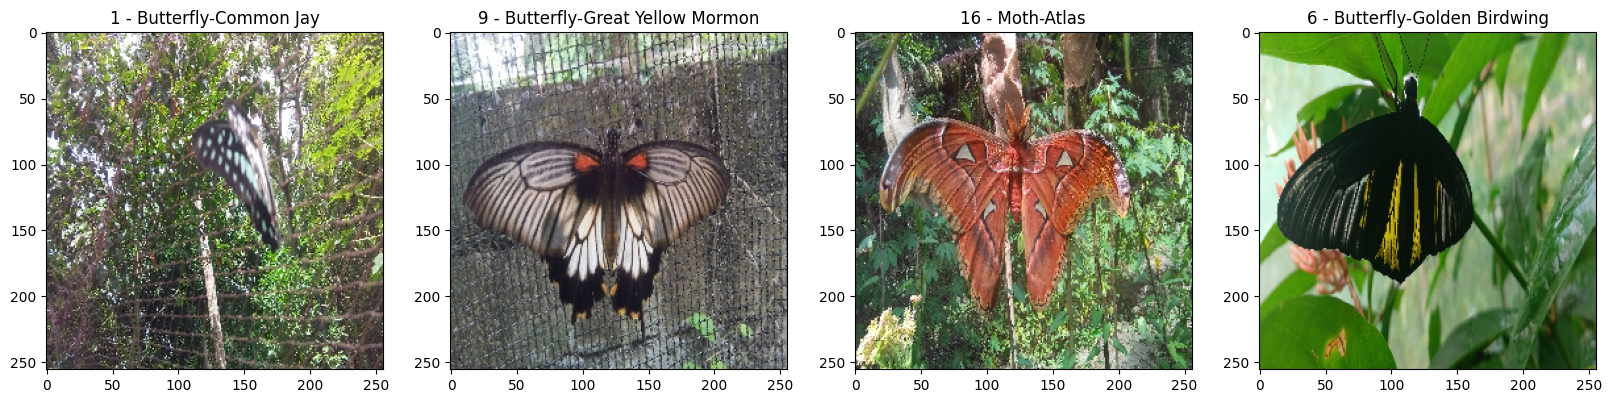

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    label_with_number = f"{batch[1][idx]} - {class_names[batch[1][idx]]}"  # Concatenate number and label
    ax[idx].title.set_text(label_with_number)  # Set title with both



In [ ]:
data = data_dir.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[4.29503679e-01, 9.55438137e-01, 8.71629894e-01],
          [4.47395831e-01, 9.80729163e-01, 8.94454658e-01],
          [4.04120713e-01, 9.37454045e-01, 8.51179540e-01],
          ...,
          [8.39782476e-01, 7.45664835e-01, 8.00566792e-01],
          [8.45419705e-01, 7.59145200e-01, 8.10125589e-01],
          [8.61427724e-01, 7.78339446e-01, 8.27726722e-01]],
 
         [[4.24708933e-01, 9.55101132e-01, 8.65885437e-01],
          [4.47824746e-01, 9.88020837e-01, 8.98314953e-01],
          [4.29764092e-01, 9.63097453e-01, 8.76822889e-01],
          ...,
          [8.51822913e-01, 7.61626840e-01, 8.24371934e-01],
          [8.70465696e-01, 7.81250000e-01, 8.43504906e-01],
          [8.64261627e-01, 7.81908691e-01, 8.40732217e-01]],
 
         [[4.35401350e-01, 9.60891545e-01, 8.66773903e-01],
          [4.12101716e-01, 9.45435047e-01, 8.58180165e-01],
          [4.40946698e-01, 9.74280000e-01, 8.88005495e-01],
          ...,
          [8.70098054e-01, 7.87745118e-01, 8.4656

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[Precision(), Recall(), CategoricalAccuracy()])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=3, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 129s 11s/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.9437 - recall: 1.0000 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 0.8958 - val_recall: 1.0000
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 88s 8s/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00 - precision: 0.9616 - recall: 1.0000 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 0.9375 - val_recall: 1.0000
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - categorical_accuracy: 0.1342 - loss: 0.0000e+00 - precision: 0.9457 - recall: 1.0000 - val_categorical_accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_precision: 0.9375 - val_recall: 1.0000


In [ ]:
# fig = plt.figure()
# plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# plt.legend(loc="upper left")
# plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [ ]:
import cv2

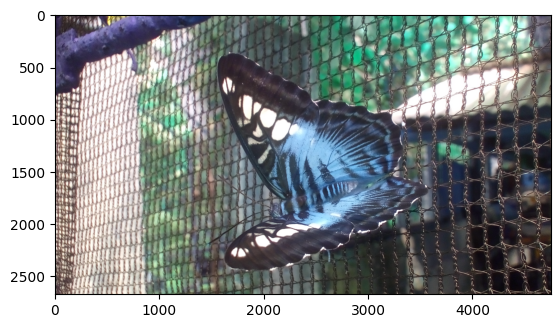

In [ ]:
img = cv2.imread('/content/drive/MyDrive/butterflyml/Butterfly/butterfly_photos/Butterfly-Clippers/Clippers Butterfly 1.jpg')
plt.imshow(img)
plt.show()

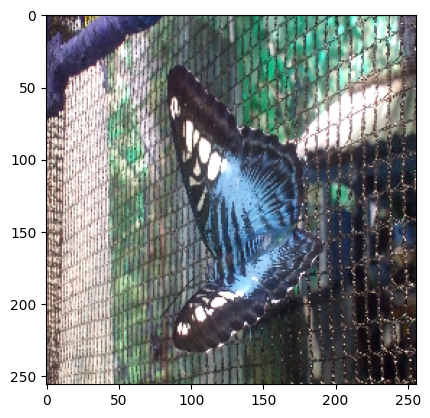

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

#Save the model

In [ ]:
model.save('/content/drive/MyDrive/model/butterfly/butterfly_photos.h5')

In [ ]:
model.save('/content/drive/MyDrive/model/butterfly_photos.keras')

#Extract model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/model/butterfly_photos.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Save the model architecture to a JSON file
model_json = model.to_json()
with open("/content/drive/MyDrive/model/butterfly_photos.json", "w") as json_file:
    json_file.write(model_json)

#Test the model

In [ ]:


# Assuming 'test' is your dataset and you want to reshape it
test_array = np.array(img)  # Convert the dataset into a NumPy array
#test_reshaped = test_array.reshape(300, 72, 72, 1)

In [ ]:
input_data = test  # Replace 'your_test_data' with your actual data


In [ ]:
predictions = model.predict(input_data)

# Convert the probabilities to class labels
predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 39s 39s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0024
Recall: 0.0769
Confusion Matrix:
[[1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0]]


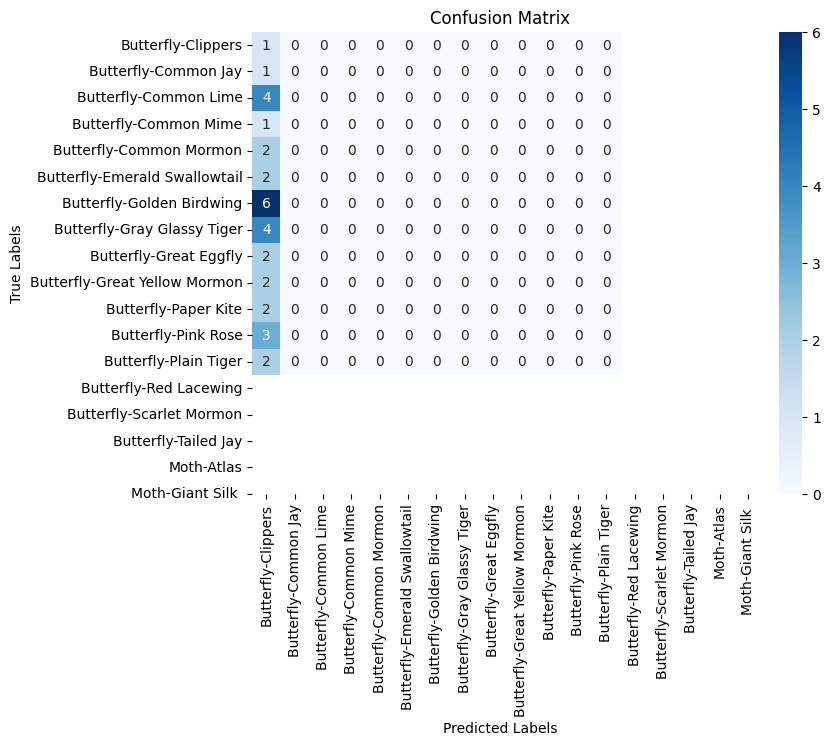

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import numpy as np

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Ensure true labels match the expected format
true_labels = np.concatenate([y for x, y in test], axis=0)

# Compute precision, recall, and confusion matrix
precision = precision_score(true_labels, predicted_classes, average='macro')
recall = recall_score(true_labels, predicted_classes, average='macro')
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Display results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, predicted_classes)
print(f"Accuracy score is {accuracy * 100}%")

In [ ]:
print(len(test))



In [ ]:
true_labels = np.concatenate([y for x, y in test], axis=0)
print(len(true_labels))  # Ensure it matches the length of predicted_classes
